# Programa para plotar condições de superficie nas estações
### Precipitacao e vento estacao Mirante de Santana
### Temperatura, temperatura do ponto de orvalho e vento estacao IAG

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import matplotlib.dates as md
import pandas as pd
import seaborn as sns

In [2]:
def make_date (ano, mes, dia, hora):
    """
    Função para criar a data para usar no plot
    """
    somedates = ano*10000000000 + mes*100000000 + dia*1000000 + hora*10000
    dates = [datetime.datetime.strptime(str(int(date)),'%Y%m%d%H%M%S') for date in somedates]
    return dates

In [4]:
dados_IAG = pd.read_table("Observacao_IAG.txt", sep='\s+')
dates_IAG = make_date(dados_IAG['ANO'], dados_IAG['MES'], dados_IAG['DIA'], dados_IAG['HORA'])
dir_obs = dados_IAG['DIR(graus)']
vel_obs = dados_IAG['VEL(ms)']
u = -vel_obs * np.sin((np.pi/180)*dir_obs)
v = -vel_obs * np.cos((np.pi/180)*dir_obs)

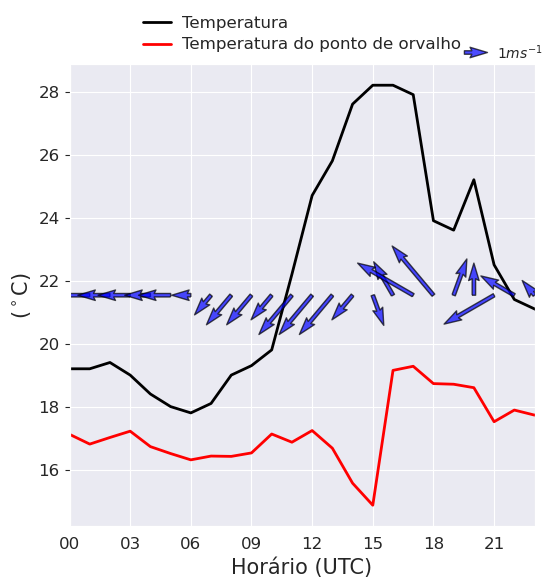

In [6]:
fig, ax = plt.subplots(figsize=(6, 6),facecolor="w")
sns.set_style("dark")
sns.lineplot(
        data=dados_IAG,x=dates_IAG,y=dados_IAG['TEMP(C)'],color='k',linewidth=2.0, 
         ax=ax, label='Temperatura'
        )
sns.lineplot(
        data=dados_IAG,x=dates_IAG,y=dados_IAG['TD(C)'],color='r',linewidth=2.0,
         ax=ax, label='Temperatura do ponto de orvalho'
        )
ax2 = ax.twinx()
Q = ax2.quiver(dates_IAG, 0, u, v,angles='uv', scale_units='y', scale=2.0, ec='k',facecolors='b',linewidth = 1,alpha=0.7)
qk = ax2.quiverkey(Q, 0.82, 0.9, 1, r'$1 m s^{-1}$', labelpos='E', coordinates='figure')
ax.set_xbound(lower=datetime.datetime(2016,12,18,0,0,0), upper=datetime.datetime(2016,12,18,23,0,0))
ax.xaxis.set_major_locator(md.HourLocator(byhour=range(0,24,3)))
ax.xaxis.set_major_formatter(md.DateFormatter('%H'))
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.tick_params(axis='both', which='major', labelsize=12)
#    ax.set_ylim([ymin,ymax+0.5])
ax2.set_ylim([-5,5])
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=1, title=None, frameon=False,
)
plt.setp(ax.get_legend().get_texts(), fontsize='12')
ax2.set_yticks([])
ax.set_xlabel(r'Horário (UTC)',size=15)
ax.set_ylabel('($^\circ$C)',  size = 15)
#plt.savefig('CicloDiurno_TempTdVento_IAG', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
dados_A701 = pd.read_table("Observacao_A701.txt", sep='\s+')
dates_A701 = make_date(dados_A701['ANO'], dados_A701['MES'], dados_A701['DIA'], dados_A701['HORA'])

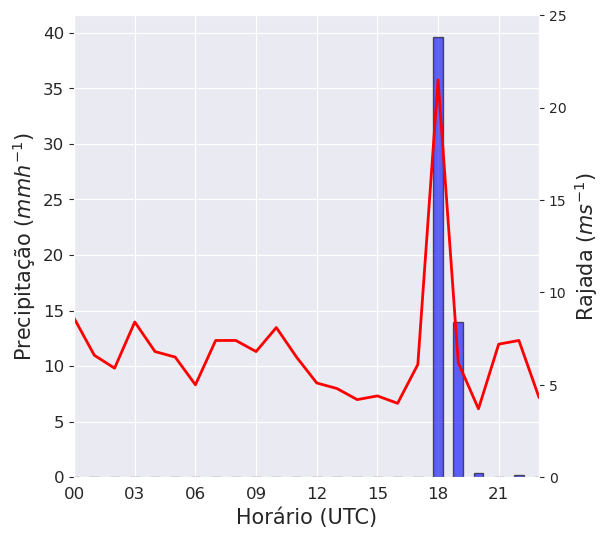

In [10]:
fig, ax = plt.subplots(figsize=(6, 6),facecolor="w")
sns.set_style("dark")
bar = ax.bar(dates_A701, dados_A701['PRECIPITACAO(mm)'], linewidth=1.0,color='b',edgecolor='k',width=0.02,
             alpha=0.6)
ax2 = ax.twinx()
sns.lineplot(
        data=dados_A701,x=dates_A701,y='RAJADA(m/s)',color='r',linewidth=2.0,
         ax=ax2
        )
ax.set_xbound(lower=datetime.datetime(2016,12,18,0,0,0), upper=datetime.datetime(2016,12,18,23,0,0))
ax.xaxis.set_major_locator(md.HourLocator(byhour=range(0,24,3)))
ax.xaxis.set_major_formatter(md.DateFormatter('%H'))
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylim([0,25])
ax.set_xlabel(r'Horário (UTC)',size=15)
ax.set_ylabel('Precipitação ($mm h ^{-1}$)',  size = 15)
ax2.set_ylabel('Rajada ($m s ^{-1}$)',  size = 15)
#plt.savefig('CicloDiurno_PrecipRajada_A701_ingles', dpi=300, bbox_inches='tight')
plt.show()